# Housing Price Prediction

## Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
* Which variables are important to predict the price of variable?
* How do these variables describe the price of the house?

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

#### Technical Requirements:
* Data contains 1460 entries each having 81 variables.
* Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. You need to handle them accordingly.
* You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 
* You need to find important features which affect the price positively or negatively.
* Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.


In [182]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
#import missingno

from datetime import datetime
from datetime import date

#importing encoders
from sklearn.preprocessing import OrdinalEncoder

#importing the standard scaler
from sklearn.preprocessing import StandardScaler

# importing imputers
from sklearn.impute import KNNImputer


#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score


#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
#from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [125]:
# Loading the Data sets
''' We have two data sets train and test, we use the train dataset to train the model and test data set for testing the 
model that is built, EDA and feature engineering will be performed on both train and test dataset '''

train=pd.read_csv("D:/Krsna/Internship/Housing prediction/Project-Housing--2---1---1-/Project-Housing_splitted/train.csv")
test=pd.read_csv("D:/Krsna/Internship/Housing prediction/Project-Housing--2---1---1-/Project-Housing_splitted/test.csv")

In [126]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [127]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

> Inferences

* Train Dataset:
   Train data set has 1168 rows and 81 columns, the target is SalePrice column with continuous data, this implies a 
   Regression problem

* Test Dataset:
   Test dataset has 292 rows and 80 columns and it doesnt have SalePrice as purpose of test data set is only for testing
   

#### Feature Engineering & EDA 

In [128]:
# combining the train and test datasets for EDA and feature engineering

train["source"]="train"
test["source"]="test"

data=pd.concat([train,test],ignore_index=True)
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455    83          20       RL         78.0    10206   Pave   NaN      Reg   
1456  1048          20       RL         57.0     9245   Pave   NaN      IR2   
1457    17          20       RL          NaN    11241   Pave   NaN      IR1   
1458   523          50       RM         50.0     5000   Pave   NaN      Reg   
1459  1379         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1            Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
2            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
3            Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   
4            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1456         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1457         Lvl    AllPub  ...    NaN    NaN        Shed     700      3   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1459         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice  source  
0      2007       WD         Normal   128000.0   train  
1      2007       WD         Normal   268000.0   train  
2      2007       WD         Normal   269790.0   train  
3      2010      COD         Normal   190000.0   train  
4      2009       WD         Normal   215000.0   train  
...     ...      ...            ...        ...     ...  
1455   2008       WD         Normal        NaN    test  
1456   2008       WD         Normal        NaN    test  
1457   2010       WD         Normal        NaN    test  
1458   2006       WD         Normal        NaN    test  
1459   2006       WD         Normal        NaN    test  

[1460 rows x 82 columns]

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> Inferences :
   
   * Column ID can be removed as it is index of data
   * Considerate amount of nulls can be observed in most of the columns
   * Columns like Alley,FireplaceQu,PoolQC, Fence, MiscFeature have almost 95% of nulls needs to be checked before imputing

In [130]:
print("Unique values of Alley apart from nulls are : \n",data["Alley"].value_counts())
print("***"*40)
print("Unique values of FireplaceQu apart from nulls are : \n",data["FireplaceQu"].value_counts())
print("***"*40)
print("Unique values of PoolQC apart from nulls are : \n",data["PoolQC"].value_counts())
print("***"*40)
print("Unique values of Fence apart from nulls are : \n",data["Fence"].value_counts())
print("***"*40)
print("Unique values of MiscFeature apart from nulls are : \n",data["MiscFeature"].value_counts())

Unique values of Alley apart from nulls are : 
 Grvl    50
Pave    41
Name: Alley, dtype: int64
************************************************************************************************************************
Unique values of FireplaceQu apart from nulls are : 
 Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
************************************************************************************************************************
Unique values of PoolQC apart from nulls are : 
 Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
************************************************************************************************************************
Unique values of Fence apart from nulls are : 
 MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
************************************************************************************************************************
Unique values of MiscFeature apart from nulls are : 
 Shed

> Inferences : 
    
  * The above 5 columns are categorical and seem like presence or type flag , example Alley has values like Gravel or 
     pavement .
  * the missing values can be imputed with 'None' as data available can influence the SalePrice.

In [131]:
data=data.drop(columns=['Id'])

In [132]:
for i in ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']:
    data[i]=data[i].fillna('None')

> Inferences:
  * There are four columns which actually give the age parameter but are given in year, this columns can be future 
    engineered to age
      Ex: Year built is given as 1976 , age can be derived from this by deducting the value from present year 
          age= 2022-1976 = 46

In [133]:
#born = datetime.strptime(born, "%d.%m.%Y").date()
today = date.today()

today.year

date.today().year

2022

In [134]:
#creating the new columns with age for feature engineering
data['Building_age'] = date.today().year - data['YearBuilt']
data['years_after_remod'] = date.today().year - data['YearRemodAdd']
data['GarageAge'] = date.today().year - data['GarageYrBlt']
data['years_after_sold'] = date.today().year - data['YrSold']

In [135]:
#Deleting the old columns with year
data=data.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'])

In [136]:
# minimum and maximum values of column updated to check consistency of data
print("Minimum of Building_age is :",data["Building_age"].min() ,", Maximum of Building_age is: ",data["Building_age"].max())

print("Minimum of years_after_remod is :",data["years_after_remod"].min() ,", Maximum of years_after_remod is: ",data["years_after_remod"].max())

print("Minimum of GarageAge is :",data["GarageAge"].min() ,", Maximum of GarageAge is: ",data["GarageAge"].max())

print("Minimum of years_after_sold is :",data["years_after_sold"].min() ,", Maximum of years_after_sold is: ",data["years_after_sold"].max())

Minimum of Building_age is : 12 , Maximum of Building_age is:  150
Minimum of years_after_remod is : 12 , Maximum of years_after_remod is:  72
Minimum of GarageAge is : 12.0 , Maximum of GarageAge is:  122.0
Minimum of years_after_sold is : 12 , Maximum of years_after_sold is:  16


#### imputing nulls in categorical column with mode

In [137]:
#imputing nulls of categorical column with 
for i in data.columns:
    if data[i].dtypes=='object':
        if data[i].isnull().sum() > 0:
            data[i]=data[i].fillna(data[i].mode()[0])

In [138]:
#Value counts for categorical variables

for i in data.columns:
    if data[i].dtypes=='object':
        print("Value counts of colunn ", i ," is : \n", data[i].value_counts())
        print("***"*40)

Value counts of colunn  MSZoning  is : 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
************************************************************************************************************************
Value counts of colunn  Street  is : 
 Pave    1454
Grvl       6
Name: Street, dtype: int64
************************************************************************************************************************
Value counts of colunn  Alley  is : 
 None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
************************************************************************************************************************
Value counts of colunn  LotShape  is : 
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
************************************************************************************************************************
Value counts of colunn  LandContour  is : 
 Lvl    1311
B

In [139]:
# Column Utilities have 1460 rows with two values  
#out of which AllPub    1459 , NoSeWa       1 

# We can drop this column

data=data.drop(columns=['Utilities'])

### Visualising the data 

#### Heat map for checking the correlation

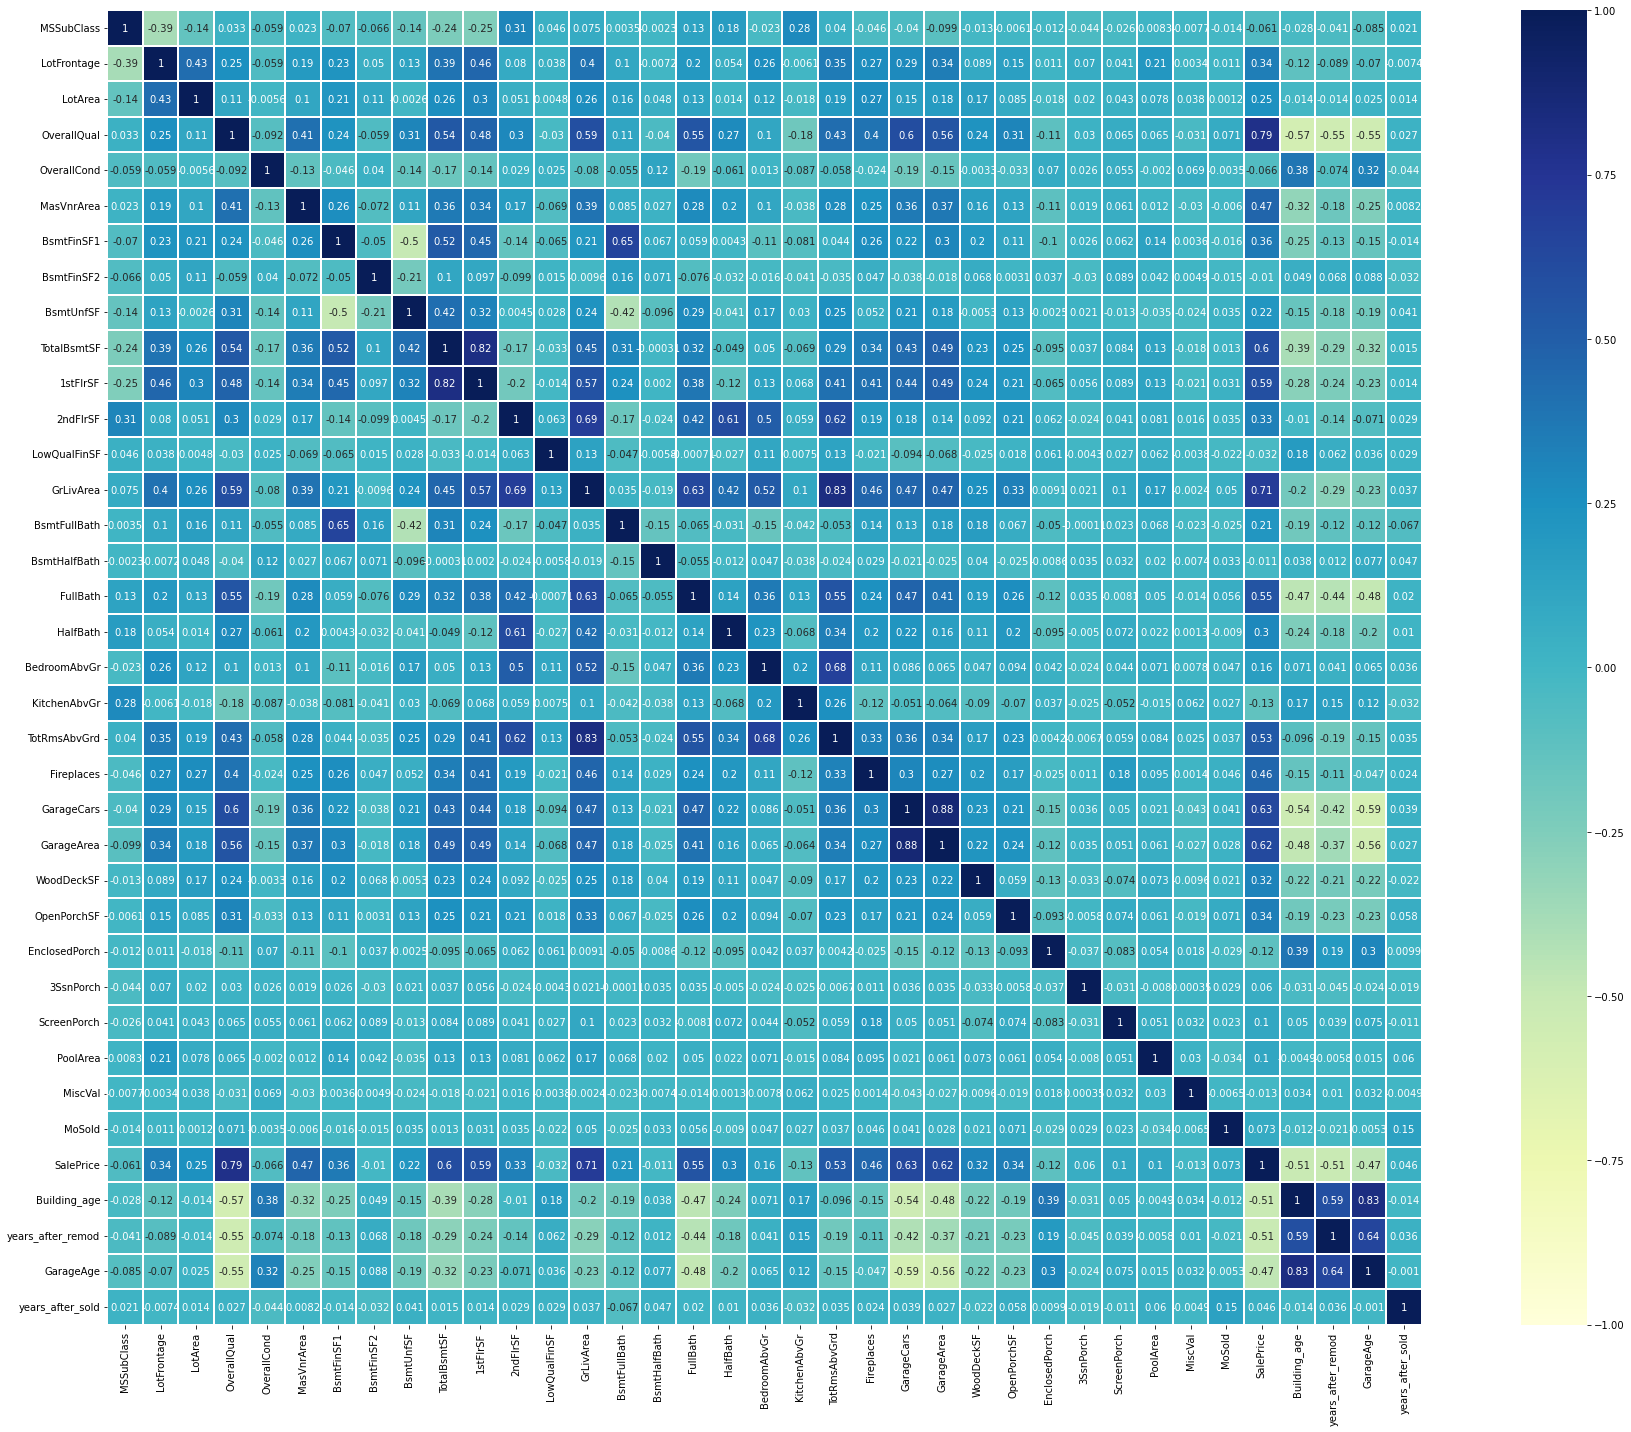

In [60]:
data_corr=data.corr()
plt.figure(figsize=(28,20))
sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1,cmap='YlGnBu')
plt.tight_layout()

> Inferences from correlation heatmap :

* Columns like OverallQual,TotalBsmtSF,1StFLRSF,Garagecars, Garagearea,GrLivArea have good correlation with target 
  SalePrice
* Columns like Building area, years_after_remod, GarageAge have poor relation with target variable
* Column "OverallQual" is having highest (79%) correlation with target variable

> MultiColinearity
* column GarageArea is highly correlated (88%) with column GarageCars.
* column GarageAge is highly correlated (83%) with column Building_age.
* column TotRmsAbvGrd is higly correlated (83%) with column GrLivArea.

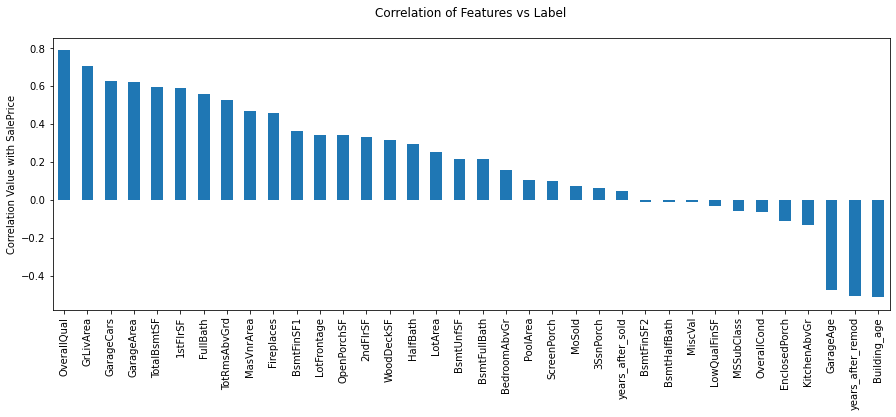

In [140]:
# Correlation of features vs targets
data_corr = data.corr()
plt.figure(figsize=(15,5))
data_corr['SalePrice'].sort_values( ascending = False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value with SalePrice")
plt.show()

> Inferences :

* looking at the above plot we can say that the features like overall quality, grlivArea, GarageCars, garage area are 
  having maximum positive relation with the target variable.
* And features like building age, years_after_remod, GarageAge are in negative relation with the target variable.

In [141]:
'''From above plot BsmtFinSF2 , BsmtHalfBath,MiscVal, LowQualFinSF,PoolArea have least relation to target and these columns can 
be dropped  '''
#Dropping the columns

data=data.drop(columns=['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2','BsmtHalfBath'])

In [142]:
continuous_columns=[]
categorical_columns=[]

for i in data.columns:
    if data[i].dtype != 'object' and i!='SalePrice' :
        continuous_columns.append(i)
    elif data[i].dtype =='object' and i!='source':
        categorical_columns.append(i)
        
        

#### Distribution of data

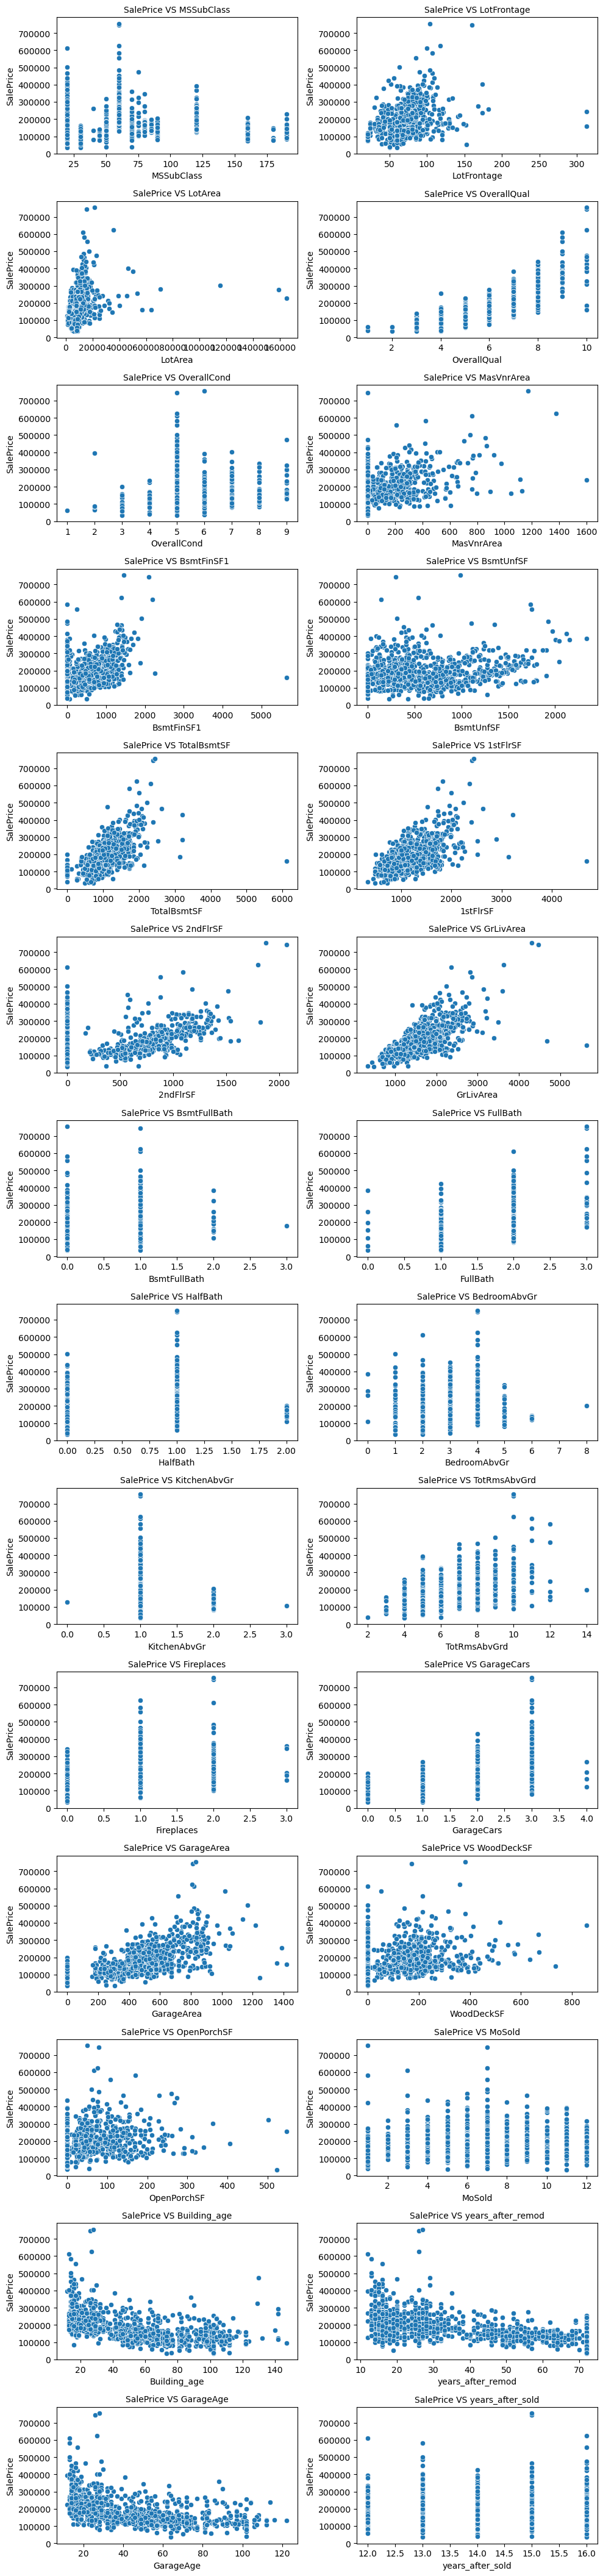

In [64]:
plt.style.use('default')
plt.figure(figsize=(10,60))
for i in range(len(continuous_columns)):
    plt.subplot(20,2,i+1)
    sns.scatterplot(y=data['SalePrice'],x=data[continuous_columns[i]])
    plt.title(f"SalePrice VS {continuous_columns[i]}",fontsize=10)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.tight_layout()       
            

> Inferences: 

Above scatter plots are showing the relation between some numerical features vs SalesPrice.

* If the linear feet of street connected to property is more, then the sales price is higher.
* The Masonry veneer area increases the price of the house also get higher.
* If the house is with more area of type 1 finished the price is higher.
* There are less number of houses with type 2 finish as the area for type two is given zero for most houses.
* As the lot size get higher the price also will increases.
* The buildings which have built long back are having less sales price compare to new buildings. Similarly As if Building 
  modification has done long back then the price is less.
* If garages have been built recently the building is having higher sales price
* We can see almost all the buildings have been sold in recent years.
* We can see that in most of the cases the Unfinished basement area is below 1000 square feets And it will also tell us 
  that the Sales prices will increase as total basement area increases.
* We can see that most houses are having more area at first floor compare to second floor And some of the houses are not 
  having rooms at second floor.
* Sales prices increases with the floor area.
* We can see most of the houses are with very less area finished with low quality, and also it is observed that more area 
  finished with low quality causes reduction in sale price.
* And as above grade (ground) living area and garage area increases the sale price also increases.

* Looking at above plot we can say that more number of MSSubClass are 20 and 60 and having higher sale prices also.
* We can see there is good linear relation between OverallQual and SalePrice, that is as quality increases the price of the
  house also gets higher.
* Most of the house data shows basement full bathrooms as 0 and 1, and it seems like the number of basement bathrooms is 
  not affecting our sales price.
* Most of the houses are not having basement half bathrooms.
* There is some relation is observed between full bathrooms above grade and salePrice. Large count of houses are with 1 - 2 
  full bathrooms above grade.
* Many houses are with zero and 1 half-bathrooms, and very few with 2 half_bathrooms.
* Large number of houses are having 2 to 4 bedrooms and having higher prices. And very few houses are with more than 5 
  bedrooms which are having lower price.
* Most of the houses are having single kitchen and some houses with two kitchens. Sale price is higher in case of houses 
  with single kitchen.
* We can observe some linear relation between Total rooms above grade and Sale Prices as the number of rooms increases the 
  price also goes up.
* Some houses are not having fire places and some are with 1 to 2 fire places, very few houses are haveing 3 fire places.
* Sales price of house increases with the Size of garage in car capacity. But as the size of garage increases beyond 3 the 
  price comes down.
* We can see that MoSold column is havng the data from every column and it may not have any significant impact on our 
  target variable.

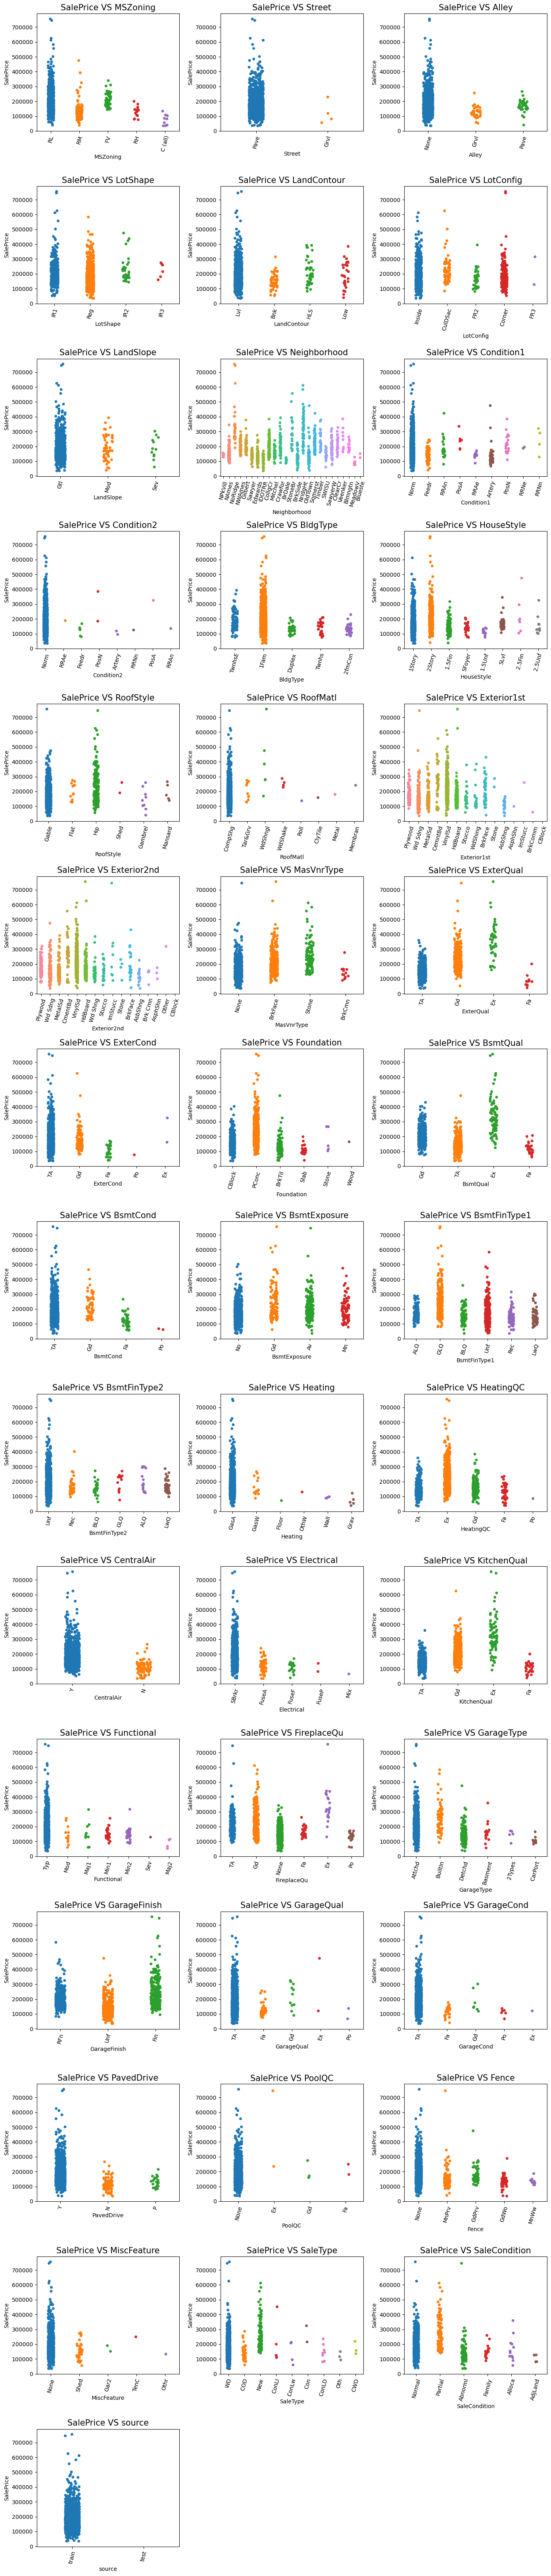

In [65]:
# Stripplot of all catagorical features vs SalePrice:

#col1 = df.select_dtypes(exclude=[np.number]).columns
plt.style.use('default')
plt.figure(figsize=(14,65))
for i in range(len(categorical_columns)):
    plt.subplot(15,3,i+1)
    sns.stripplot(y=data['SalePrice'],x=data[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=15)
    plt.xticks(rotation = 75)  
    plt.tight_layout()

> Inferences:

* Most of the houses are belongs to Residential Low Density zone. and many houses from this zone are having higher prices than other zones.

* We can observe almost all houses are having paved streets and very few are having gravel streets.

* Large number of houses are having General shape of property slightly irregular or regular. very few are having irregular shape.

* looking at the SalePrice vs LandContour plot we can say that most of the houses are nearly Flat/Leveled.

* Almost all houses are with all kind of utilities.

* More number of lots are inside or at corners.

* We can see most of the houses are having gentle slopes, and houses with sever slopes are having slightly lower prices.

* Houses which are located in Northridge are having more prices compared to other locations.

* Looking at plot for SalePrice vs Condition1 we can see that most number of houses bearing normal conditions.

* Looking at the plot for SalePrice vs Condition2 we can see that most houses having normal conditions and very few with 
  other conditions.

* Most houses are Single-family Detached and are having higher sale prices than other categories.

* Looking at the plot of SalePrice vs HouseStyle we can see that the houses which are having style of dweling 1-story and 2-story are having higher prices than other types.

* Many houses are having roof style with gable and hip. and very less number of houses are having shed.

* Many houses are having roof material as standard (Composite) Shingle and houses with roof material as Standard (Composite) Shingle and Wood Shingles are having higher prices.

* Many houses are having Vinyl Siding as 1st and 2nd covering on the house and are also having higher prices, houses with hard board and cement shilding are also having higher prices.

* We can observe that the houses are with foure Masonry veneer types that are , Brick Common, Brick Face,Cinder Block, Stone. Houses with Brick Common are having lower price.

* The prices of houses are higher when material used for exterior are good or excellent.

* It is observed that the present conditions of exterior material is mostly average/typical and good and prices for the same are higher.

* Many houses are having cinder block and Poured Contrete foundation and very less houses are having wood foundations, houses with Poured Contrete foundations are having higher prices.

* Basement quality is mostly average or good and the houses with excelent basement quality are having more prices.

* Most of the houses are having average/Typical basement conditions and very few houses are with poor basement conditions.

* It seems like basement exposure is not strongly related to the sale price.

* Most number of houses are having Heating type as Gas forced warm air furnace and Sale price of houses are higher whenever the quality of heating is excellent.

* Most houses are having central air conditioning and are having more prices than that of houses which are without air conditioning.

* Most of the houses with Standard Circuit Breakers & Romex electrical system and are having higher sale prices as well. Very less number of houses are with Mixed type of electrical systems.

* Most houses are with good and average kitchen quality, houses are having higher prices when kitchen quality is excellent.

* Mostly houses are with typical functionality and very less numberof houses are having severely damaged functionality.

* In vary rare cases fire place are prefabricated fireplace in basement and ben franklin Stove and these houses are having lower prices.

* In most of the cases garage is attatched to the house only. And when garage is attatched to home or Built-In the house prises are higher and it seems like garage finish does not affect much to sale prices. Mostly garages are with typical/average quality and conditions.

* Most of the houses are having paved drive ways

* Many houses are having Sale type of Warranty Deed - Conventional and just constructed and sold and are having higher prices.

* Also many houses are having sale conditions as Normal Sale and Home was not completed when last assessed (associated with New Homes).

In [85]:
data.describe().T

count           mean           std      min        25%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage        1201.0      70.049958     24.284752     21.0      59.00   
LotArea            1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual        1460.0       6.099315      1.382997      1.0       5.00   
OverallCond        1460.0       5.575342      1.112799      1.0       5.00   
MasVnrArea         1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.00   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea          1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.00   
FullBath           1460.0       1.565068      0.550916      0.0       1.00   
HalfBath           1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr       1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.00   
GarageCars         1460.0       1.767123      0.747315      0.0       1.00   
GarageArea         1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.00   
MoSold             1460.0       6.321918      2.703626      1.0       5.00   
SalePrice          1168.0  181477.005993  79105.586863  34900.0  130375.00   
Building_age       1460.0      50.732192     30.202904     12.0      22.00   
years_after_remod  1460.0      37.134247     20.645407     12.0      18.00   
GarageAge          1379.0      43.493836     24.689725     12.0      20.00   
years_after_sold   1460.0      14.184247      1.328095     12.0      13.00   

                        50%        75%       max  
MSSubClass             50.0      70.00     190.0  
LotFrontage            69.0      80.00     313.0  
LotArea              9478.5   11601.50  215245.0  
OverallQual             6.0       7.00      10.0  
OverallCond             5.0       6.00       9.0  
MasVnrArea              0.0     166.00    1600.0  
BsmtFinSF1            383.5     712.25    5644.0  
BsmtUnfSF             477.5     808.00    2336.0  
TotalBsmtSF           991.5    1298.25    6110.0  
1stFlrSF             1087.0    1391.25    4692.0  
2ndFlrSF                0.0     728.00    2065.0  
GrLivArea            1464.0    1776.75    5642.0  
BsmtFullBath            0.0       1.00       3.0  
FullBath                2.0       2.00       3.0  
HalfBath                0.0       1.00       2.0  
BedroomAbvGr            3.0       3.00       8.0  
KitchenAbvGr            1.0       1.00       3.0  
TotRmsAbvGrd            6.0       7.00      14.0  
Fireplaces              1.0       1.00       3.0  
GarageCars              2.0       2.00       4.0  
GarageArea            480.0     576.00    1418.0  
WoodDeckSF              0.0     168.00     857.0  
OpenPorchSF            25.0      68.00     547.0  
MoSold                  6.0       8.00      12.0  
SalePrice          163995.0  215000.00  755000.0  
Building_age           49.0      68.00     150.0  
years_after_remod      28.0      55.00      72.0  
GarageAge              42.0      61.00     122.0  
years_after_sold       14.0      15.00      16.0

### Outliers

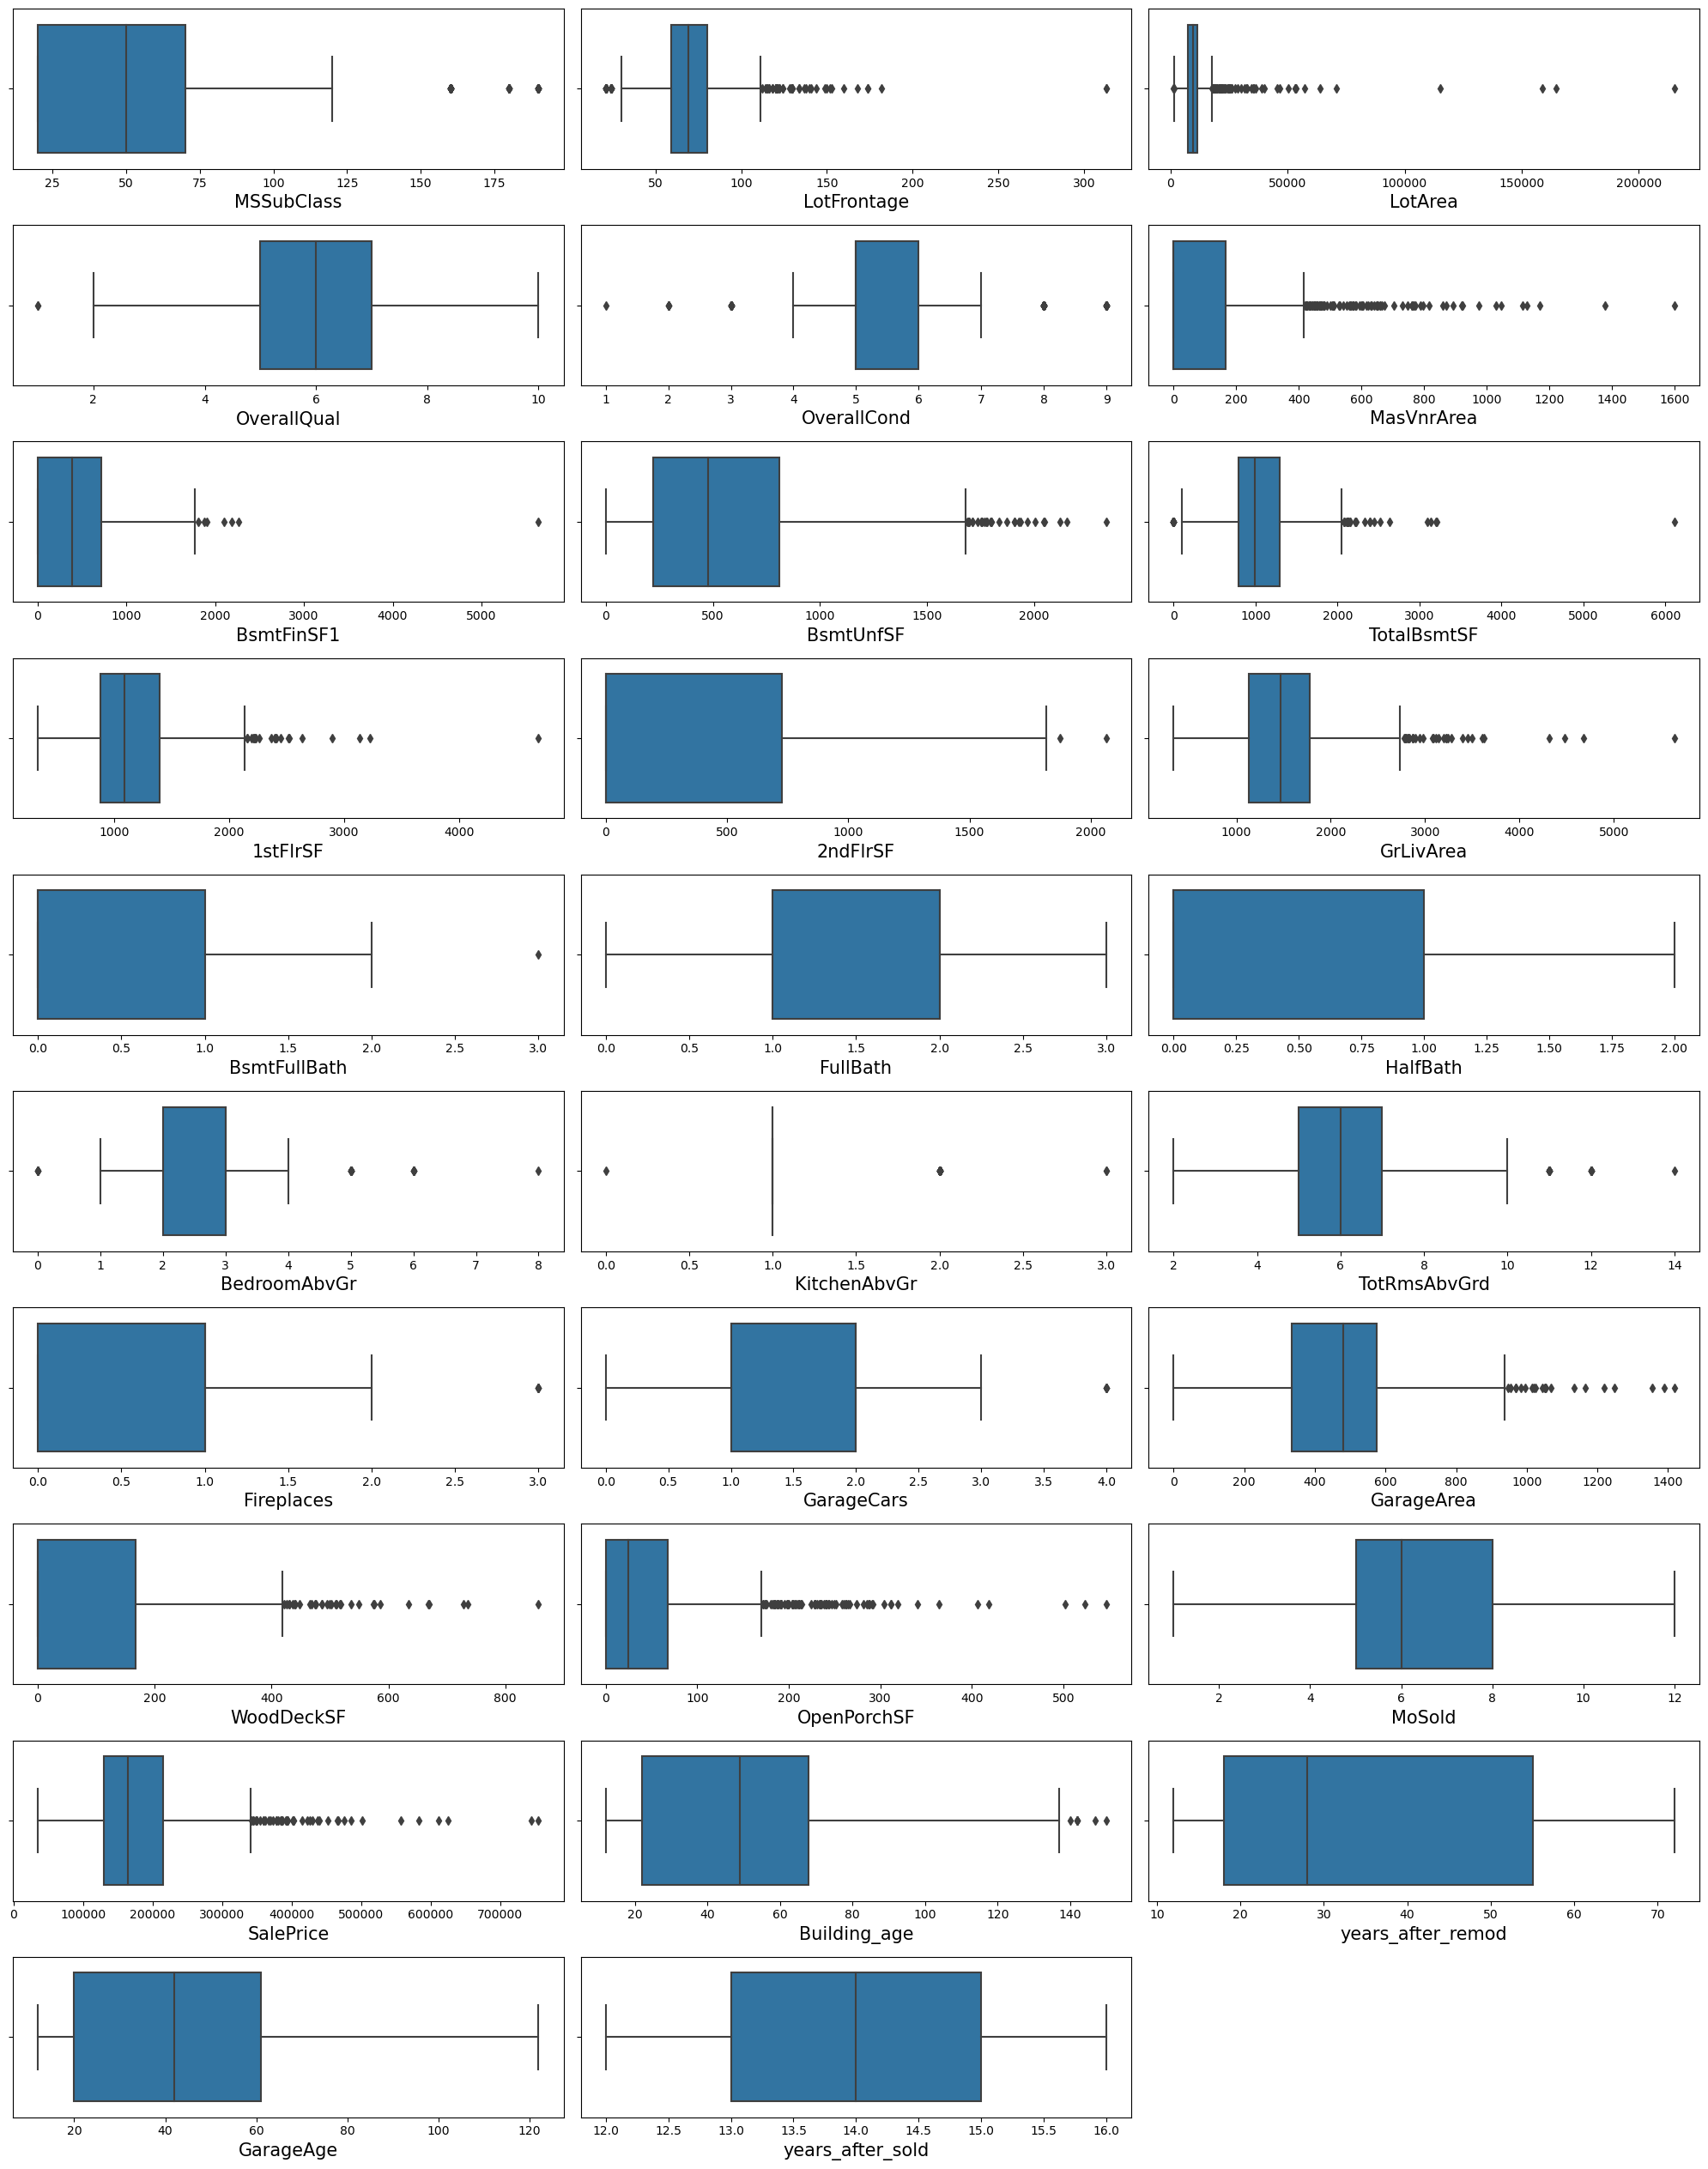

In [66]:
#lets check outliers from continuous columns

num_data = data._get_numeric_data()
plt.figure(figsize = (20,40), facecolor='white')
plotnumber = 1
for column in num_data:
    if plotnumber <=50:
        ax = plt.subplot(16,3,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.tight_layout()

> Inferences:
* As we can see many columns are having outliers and if we remove these outliers using z-score/IQR method we will lose lot 
  of the data, so we are replacing those outliers by percentile method.

In [143]:
column = ['MSSubClass','LotFrontage','LotArea','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','TotRmsAbvGrd','WoodDeckSF','OpenPorchSF']

for i in range(len(column)):
    percentile=data[column[i]].quantile([0.01,0.98]).values
    data[column[i]][data[column[i]]<=percentile[0]]=percentile[0]
    data[column[i]][data[column[i]]>=percentile[1]]=percentile[1]
    

### Skewness checking

In [144]:
data.skew()

MSSubClass           1.396033
LotFrontage          0.218084
LotArea              1.171750
OverallQual          0.216944
OverallCond          0.633986
MasVnrArea           1.794694
BsmtFinSF1           1.685503
BsmtUnfSF            0.920268
TotalBsmtSF          0.155608
1stFlrSF             1.376757
2ndFlrSF             0.813030
GrLivArea            0.638350
BsmtFullBath         0.596067
FullBath             0.036562
HalfBath             0.675897
BedroomAbvGr         0.211790
KitchenAbvGr         4.488397
TotRmsAbvGrd         0.511871
Fireplaces           0.649565
GarageCars          -0.342549
GarageArea           0.179981
WoodDeckSF           1.105494
OpenPorchSF          1.562745
MoSold               0.212053
SalePrice            1.953878
Building_age         0.613461
years_after_remod    0.503562
GarageAge            0.649415
years_after_sold    -0.096269
dtype: float64

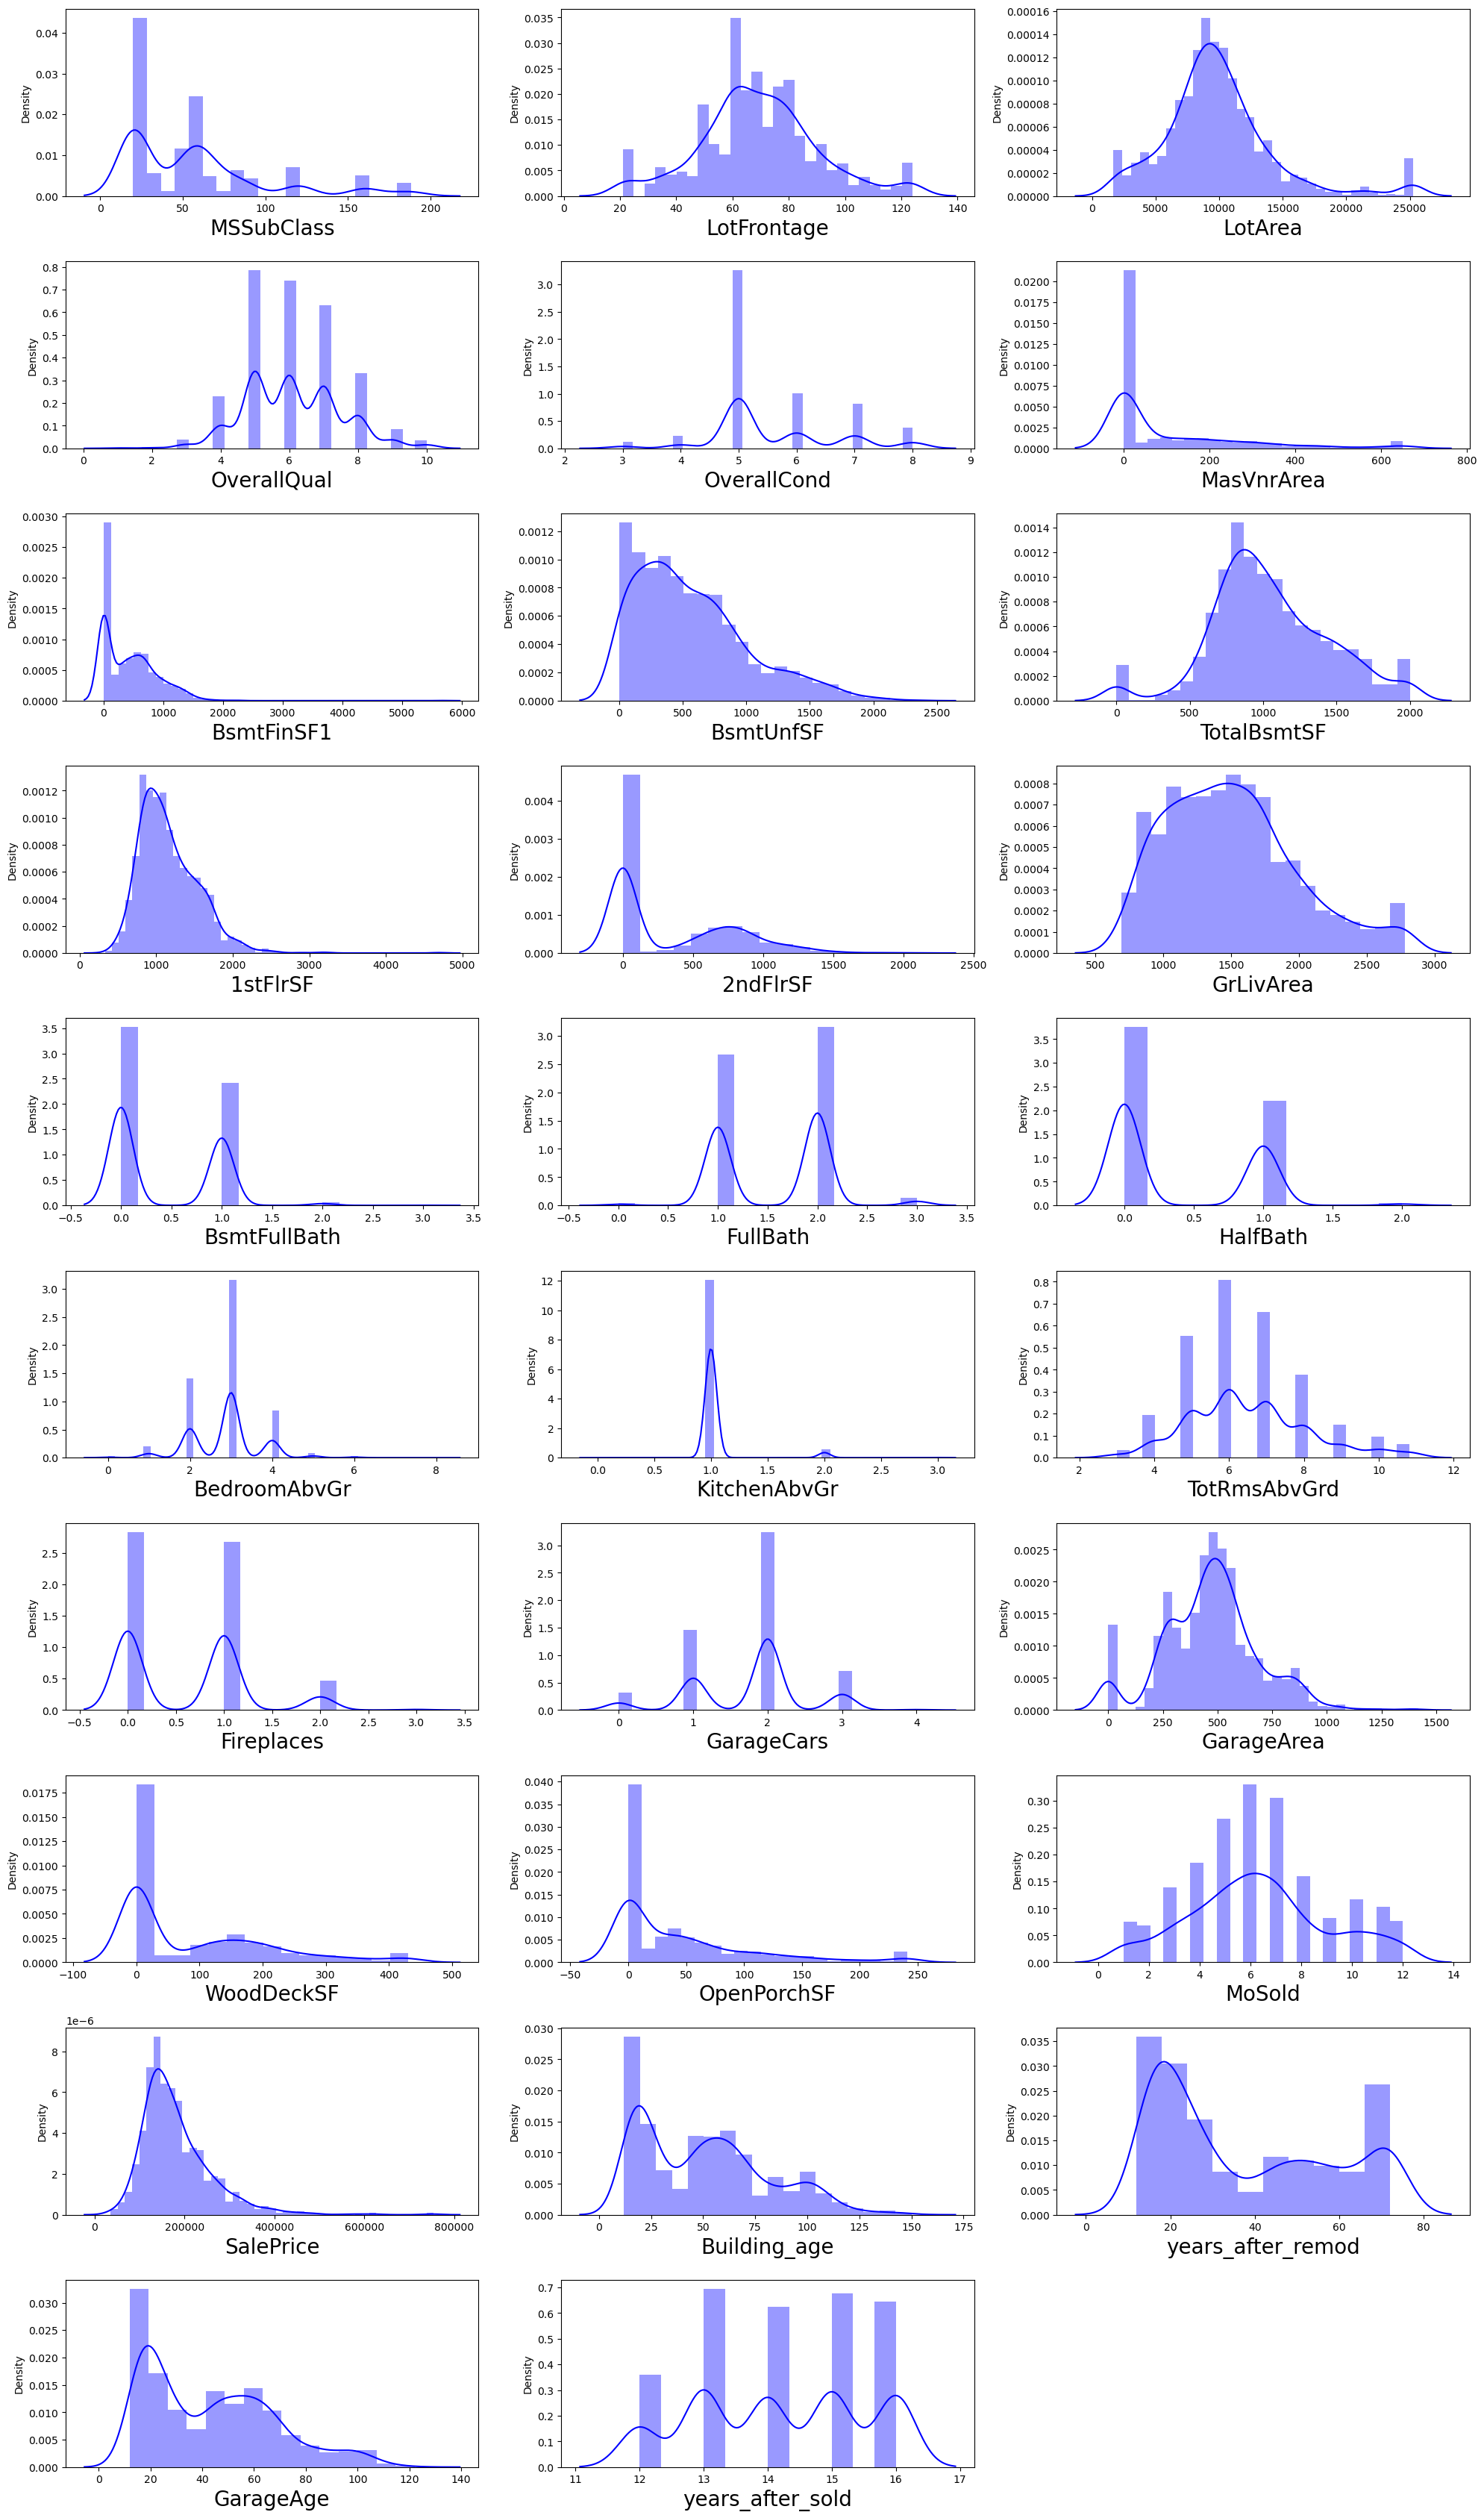

In [69]:
num_data = data._get_numeric_data()
plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=81:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(num_data[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

> Inferences from skewness:

* Skewness can be observed in most of the data

In [145]:
#Treating the skewness

for index in data.skew().index:
    if data.skew().loc[index]>0.5 and index!='SalePrice' :
        data[index]=np.log1p(data[index])
        if data.skew().loc[index]<-0.5 and index!='SalePrice' :
            data[index]=np.square(data[index])

In [71]:
data.skew()

MSSubClass           0.246619
LotFrontage          0.218084
LotArea             -0.748089
OverallQual          0.216944
OverallCond          0.081351
MasVnrArea           0.486822
BsmtFinSF1          -0.380968
BsmtUnfSF           -1.105004
TotalBsmtSF          0.155608
1stFlrSF             0.080114
2ndFlrSF             0.289643
GrLivArea           -0.061318
BsmtFullBath         0.419213
FullBath             0.036562
HalfBath             0.566168
BedroomAbvGr         0.211790
KitchenAbvGr         3.869414
TotRmsAbvGrd        -0.108218
Fireplaces           0.182083
GarageCars          -0.342549
GarageArea           0.179981
WoodDeckSF           0.148992
OpenPorchSF         -0.033965
MoSold               0.212053
SalePrice            1.953878
Building_age        -0.182963
years_after_remod    0.115027
GarageAge           -0.072623
years_after_sold    -0.096269
dtype: float64

In [146]:
data

MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
0       4.795791       RL          NaN  72.299162   Pave  None      IR1   
1       3.044522       RL         95.0  93.546302   Pave  None      IR1   
2       4.110874       RL         92.0  84.684331   Pave  None      IR1   
3       3.044522       RL        105.0  87.830236   Pave  None      IR1   
4       3.044522       RL          NaN  94.465265   Pave  None      IR1   
...          ...      ...          ...        ...    ...   ...      ...   
1455    3.044522       RL         78.0  85.208205   Pave  None      Reg   
1456    3.044522       RL         57.0  83.392443   Pave  None      IR2   
1457    3.044522       RL          NaN  87.000615   Pave  None      IR1   
1458    3.931826       RM         50.0  72.545986   Pave  None      Reg   
1459    5.081404       RM         21.0  57.420535   Pave  None      Reg   

     LandContour LotConfig LandSlope  ... MiscFeature MoSold SaleType  \
0            Lvl    Inside       Gtl  ...        None      2       WD   
1            Lvl    Inside       Mod  ...        None     10       WD   
2            Lvl   CulDSac       Gtl  ...        None      6       WD   
3            Lvl    Inside       Gtl  ...        None      1      COD   
4            Lvl       FR2       Gtl  ...        None      6       WD   
...          ...       ...       ...  ...         ...    ...      ...   
1455         Lvl    Inside       Gtl  ...        None     10       WD   
1456         Lvl    Inside       Gtl  ...        None      2       WD   
1457         Lvl   CulDSac       Gtl  ...        Shed      3       WD   
1458         Lvl    Corner       Gtl  ...        None     10       WD   
1459         Lvl    Inside       Gtl  ...        None      6       WD   

     SaleCondition SalePrice  source  Building_age years_after_remod  \
0           Normal  128000.0   train      3.850148          3.850148   
1           Normal  268000.0   train      3.970292          3.970292   
2           Normal  269790.0   train      3.295837          3.258097   
3           Normal  190000.0   train      3.828641          3.828641   
4           Normal  215000.0   train      3.828641          3.135494   
...            ...       ...     ...           ...               ...   
1455        Normal       NaN    test      2.772589          2.772589   
1456        Normal       NaN    test      3.367296          3.332205   
1457        Normal       NaN    test      3.970292          3.970292   
1458        Normal       NaN    test      4.330733          4.290459   
1459        Normal       NaN    test      3.912023          3.912023   

     GarageAge years_after_sold  
0     3.828641               15  
1     3.970292               15  
2     3.258097               15  
3     3.828641               12  
4     3.828641               13  
...        ...              ...  
1455  2.772589               14  
1456  3.295837               14  
1457  3.970292               12  
1458  4.290459               16  
1459  3.912023               16  

[1460 rows x 72 columns]

In [147]:
#### Encoding the categorical variables with ordinal encoder
oe=OrdinalEncoder()

for i in categorical_columns:
    data[i]=oe.fit_transform(data[i].values.reshape(-1,1).astype(str))

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   float64
 1   MSZoning           1460 non-null   float64
 2   LotFrontage        1201 non-null   float64
 3   LotArea            1460 non-null   float64
 4   Street             1460 non-null   float64
 5   Alley              1460 non-null   float64
 6   LotShape           1460 non-null   float64
 7   LandContour        1460 non-null   float64
 8   LotConfig          1460 non-null   float64
 9   LandSlope          1460 non-null   float64
 10  Neighborhood       1460 non-null   float64
 11  Condition1         1460 non-null   float64
 12  Condition2         1460 non-null   float64
 13  BldgType           1460 non-null   float64
 14  HouseStyle         1460 non-null   float64
 15  OverallQual        1460 non-null   int64  
 16  OverallCond        1460 

#### Splitting the data into train and test

In [151]:
#Divide into test and train based on source column flag created earlier:
data_train = data.loc[data['source']== 'train']
data_test = data.loc[data['source']== 'test']

#resetting the index of test dataset
data_test.reset_index(drop=True,inplace=True) 

#dropping the column of source from both train and test data sets as this flag is no longer needed
data_train=data_train.drop(columns=['source'])
# dropping sales price from test dataset as this column has NaN values due to merging with train data set
data_test=data_test.drop(columns=['source','SalePrice'])


# Seperating the features X and target y from train data set for building model and prediction

X = data_train.drop(columns = ['SalePrice'])
y = data_train["SalePrice"]

### Imputing the null values

In [152]:
print("No of nulls in X features are: ", X.isnull().sum().sum())
print("No of nulls in test dataset are: ", data_test.isnull().sum().sum())
print("No of nulls in y target are: " , y.isnull().sum())

No of nulls in X features are:  285
No of nulls in test dataset are:  63
No of nulls in y target are:  0


> Inferences :

* Nulls in continuous data has been imputed with mode

* For imputing the nulls in categorical data we use the knn imputer

#### Scaling the data 

* Before imputing the data we scale both the train and test data with standard scaler

In [157]:
#using the standard scaler
Xsc=StandardScaler()
X=sc.fit_transform(X)
data_test=sc.fit_transform(X)

#### Imputing the data with knn imputer

* here we use the knn as 5 neighbors

In [162]:
# imputing the X (train datdaset with features) and data_test (test dataset) with knn imputer for imputing null values
knnimp = KNNImputer(n_neighbors=5)
X = pd.DataFrame(knnimp.fit_transform(X))
data_test=pd.DataFrame(knnimp.fit_transform(data_test))

In [166]:
print("No of nulls in X features are: ", X.isnull().sum().sum())
print("No of nulls in test dataset are: ", data_test.isnull().sum().sum())
print("No of nulls in y target are: " , y.isnull().sum())

No of nulls in X features are:  0
No of nulls in test dataset are:  0
No of nulls in y target are:  0


### Model Building

#### Checking the best random state :

In [170]:
# To find random stat which gives maximum r2_score

max_r_score=0
r_state = 0
for i in range(10,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8688151506533877 on Random State 11


In [ ]:
# Splitting the data as train and test based on the r2 score and random test as above

X_train,X_test,y_train,y_test= train_test_split(X,np.log(y),test_size=0.25,random_state=r_state)

#### Function for model building and evaluation

In [172]:
def model_built(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    pred = model.predict(X_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%','\n')
    print(f"Testing r2 Score (Accuracy score):", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test, pred, color ='crimson')
    plt.show()

#### 1. Linear Regression

MAE : 0.0984725884980771
RMSE : 0.17064127994251313
------------------------------
Training r2 Score : 91.92985253190741 % 

Testing r2 Score (Accuracy score): 78.81179540645499 %
------------------------------

Cross validation score : 79.30504195022147

Accuracy Score - Cross Validation Score : -0.4932465437664746


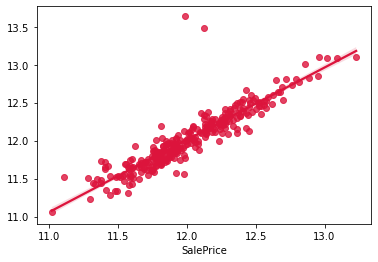

In [173]:
# Building model with linear regression
lr = LinearRegression()
model_built(lr)

#### 2.Random forest regressor model

MAE : 0.1002996257054602
RMSE : 0.1614452988067543
------------------------------
Training r2 Score : 98.05221075016921 % 

Testing r2 Score (Accuracy score): 81.03395554823976 %
------------------------------

Cross validation score : 84.84474283405741

Accuracy Score - Cross Validation Score : -3.8107872858176535


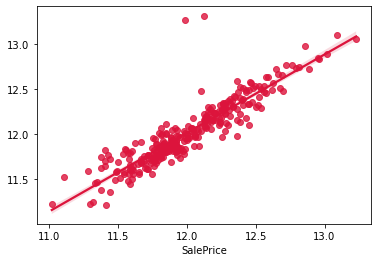

In [176]:
#model with RandomForestClassifier
rf = RandomForestRegressor()
model_built(rf)

#### 3.XG Boost Regressor model

MAE : 0.09816740355838137
RMSE : 0.1595248447568847
------------------------------
Training r2 Score : 96.00074654189542 % 

Testing r2 Score (Accuracy score): 81.48248866570277 %
------------------------------

Cross validation score : 86.42987097927985

Accuracy Score - Cross Validation Score : -4.94738231357708


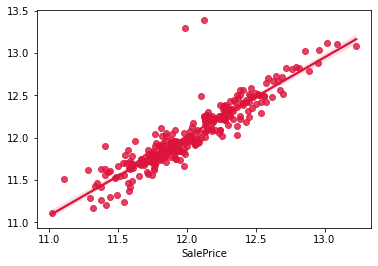

In [178]:
#Building the model with XGBoost regressor model
xgb = XGBRegressor(verbosity = 0)
model_built(xgb)

#### 4. Decision tree regressor model

MAE : 0.14978119683399385
RMSE : 0.2257412390928613
------------------------------
Training r2 Score : 100.0 % 

Testing r2 Score (Accuracy score): 62.91931341367514 %
------------------------------

Cross validation score : 69.10763998934024

Accuracy Score - Cross Validation Score : -6.188326575665101


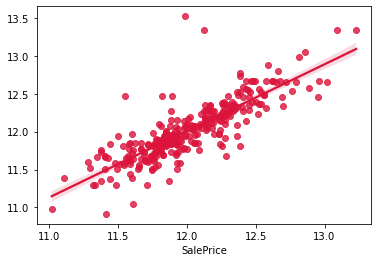

In [180]:
#Building decision treee regressor model

dt = DecisionTreeRegressor()
model_built(dt)

#### Extra Trees regressor model

MAE : 0.09705227696965238
RMSE : 0.1544981324019946
------------------------------
Training r2 Score : 100.0 % 

Testing r2 Score (Accuracy score): 82.63109555995118 %
------------------------------

Cross validation score : 85.03608304093484

Accuracy Score - Cross Validation Score : -2.4049874809836638


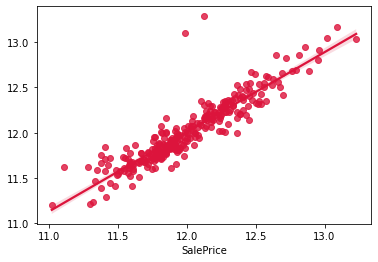

In [183]:
#Building Extra trees regressor model
ext = ExtraTreesRegressor()
model_built(ext)

#### Hyper parameter tuning

In [ ]:
LinearRegression()

In [205]:
from sklearn.model_selection import GridSearchCV
param_tuning = {
        'learning_rate': [0.01,0.19],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [0.5,1, 3, 5],
        'subsample': [0.3,0.5 ,0.7],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [200, 500],
        'objective': ['reg:squarederror']
    }

GCV=GridSearchCV(xgb,param_tuning,cv=5)

In [206]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(verbosity=0),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.19],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [0.5, 1, 3, 5],
                         'n_estimators': [200, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.3, 0.5, 0.7]})

In [207]:
GCV.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.19,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [209]:
#Training the model with best parameters

model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.3,
        learning_rate = 0.19,
        max_depth = 3,
        min_child_weight = 5,
        n_estimators = 200,
        subsample = 0.7)

model.fit(X_train,y_train)
pred = model.predict(X_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.09683890104895358
RMSE : 0.1712135267167687
------------------------------
 
r2 Score: 78.66944752703706 %
